# Analysis which song is best 


## Step:-1 Import all the required library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


## Step:-2 Read data set and find basic details

In [4]:
df=pd.read_csv('spotify_dataset.csv')

In [5]:
df


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4,0.623,0,First Contact,Twin Moons


In [6]:
df.head()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [7]:
df.tail()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.333,74.976,4,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.131,110.041,4,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.107,150.082,4,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.133,150.011,4,0.623,0,First Contact,Twin Moons
2016,2016,0.00281,0.446,204520,0.915,0.000039,9,0.2180,-6.221,1,0.141,190.013,4,0.402,0,I Wanna Get Better,Bleachers


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   int64  
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


### We have two type of data type one is numerical and one is object. In numerical datatype we have int and float values.

In [9]:
df.isnull()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2014,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [11]:
df['review'] = df['target'].map({1:'positive response',0:'negative response'})

In [12]:
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,review
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future,positive response
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino,positive response
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future,positive response
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House,positive response
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys,positive response
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise,negative response
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4,0.867,0,Candy,Dillon Francis,negative response
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man,negative response
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4,0.623,0,First Contact,Twin Moons,negative response


In [13]:
len(df['Unnamed: 0'].unique()), df.shape[0]

(2017, 2017)

### Here in this dataset uniqueness of Date column and length of the dataset both are same that means there is no sence to keep Date column

In [14]:
df = df.drop(['Unnamed: 0'],axis=1)

In [15]:
df


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,review
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future,positive response
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino,positive response
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future,positive response
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House,positive response
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys,positive response
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise,negative response
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4,0.867,0,Candy,Dillon Francis,negative response
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man,negative response
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4,0.623,0,First Contact,Twin Moons,negative response


In [16]:
df=df.drop(['time_signature'],axis=1)

In [17]:
df


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,target,song_title,artist,review
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,0.286,1,Mask Off,Future,positive response
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,0.588,1,Redbone,Childish Gambino,positive response
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,0.173,1,Xanny Family,Future,positive response
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,0.230,1,Master Of None,Beach House,positive response
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,0.904,1,Parallel Lines,Junior Boys,positive response
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise,negative response
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,0.867,0,Candy,Dillon Francis,negative response
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man,negative response
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,0.623,0,First Contact,Twin Moons,negative response


In [18]:
print ('The new Spotify dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The new Spotify dataset has 2017 rows and 16 columns


## Step 3: Descriptive Analysis

### Mean, Median, Mode, Standard Deviation, Variance, Null Values, NaN Values, Min value, Max value, Count Value, Quatilers, Correlation, Skewness.

In [19]:
df.describe(include='all')

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,target,song_title,artist,review
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017,2017,2017
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956,1343,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,River,Drake,positive response
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,16,1020
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,0.496815,0.505702,NaN,NaN,NaN
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.247195,0.500091,NaN,NaN,NaN
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,0.034800,0.000000,NaN,NaN,NaN
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,0.295000,0.000000,NaN,NaN,NaN
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,0.492000,1.000000,NaN,NaN,NaN
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,0.691000,1.000000,NaN,NaN,NaN


In [20]:
dance_ability=df['danceability']
dance_ability.describe()

count    2017.000000
mean        0.618422
std         0.161029
min         0.122000
25%         0.514000
50%         0.631000
75%         0.738000
max         0.984000
Name: danceability, dtype: float64

In [21]:
en_gy=df['energy']
en_gy.describe()

count    2017.000000
mean        0.681577
std         0.210273
min         0.014800
25%         0.563000
50%         0.715000
75%         0.846000
max         0.998000
Name: energy, dtype: float64

In [22]:
df['review'] = df['target'].map({1:'positive response',0:'negative response'})
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,target,song_title,artist,review
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,0.286,1,Mask Off,Future,positive response
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,0.588,1,Redbone,Childish Gambino,positive response
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,0.173,1,Xanny Family,Future,positive response
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,0.230,1,Master Of None,Beach House,positive response
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,0.904,1,Parallel Lines,Junior Boys,positive response
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise,negative response
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,0.867,0,Candy,Dillon Francis,negative response
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man,negative response
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,0.623,0,First Contact,Twin Moons,negative response


In [23]:
df.std()

C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


acousticness            0.259989
danceability            0.161029
duration_ms         81981.814219
energy                  0.210273
instrumentalness        0.273162
key                     3.648240
liveness                0.155453
loudness                3.761684
mode                    0.487347
speechiness             0.089931
tempo                  26.685604
valence                 0.247195
target                  0.500091
dtype: float64

## Step 4: Data Exploration

### -->Histogram of all columns to check the distribution of the columns  -->Distplot or distribution plot of all columns to check the variation in the data distribut   -->Heatmap to calculate correlation  -->Boxplot to find out outlier

### Analysis of top five Artist

In [24]:
popular_artist = df['artist'].value_counts().nlargest(5)
popular_artist

Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
Name: artist, dtype: int64

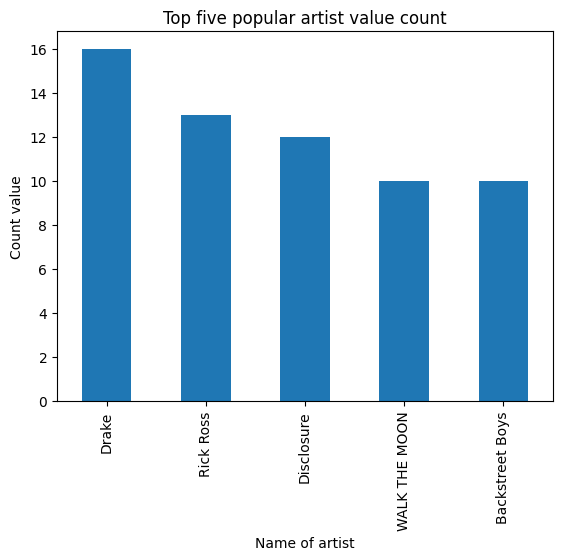

In [25]:
popular_artist.plot.bar()
plt.title('Top five popular artist value count')
plt.xlabel('Name of artist')
plt.ylabel('Count value')
plt.show()

In [26]:
top_loud = df[['loudness','song_title','artist']].sort_values(by='loudness',ascending=True).head(5)
top_loud

,loudness,song_title,artist
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta",Edvard Grieg
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends",Robert Schumann
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can...",Robert Schumann
1531,-30.447,"I Was So Young, and You Were So Beautiful",Bill Charlap
1549,-29.460,Eleanor,Hank Jones


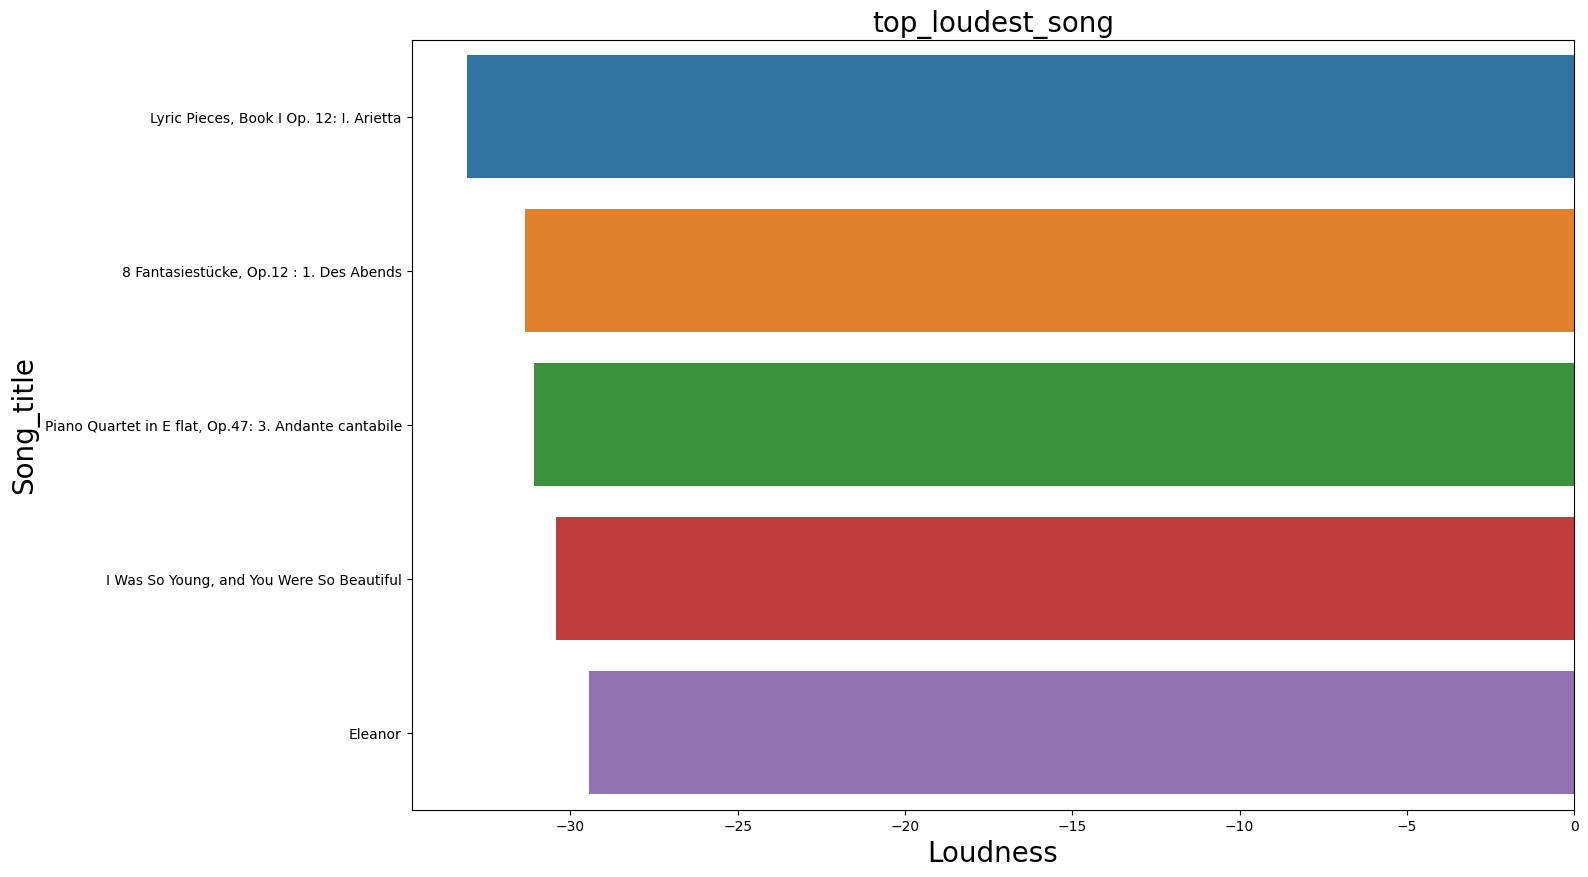

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x='loudness', y='song_title', data=top_loud)
plt.title("top_loudest_song",fontsize=20)
plt.xlabel("Loudness",fontsize=20)
plt.ylabel("Song_title",fontsize=20)
plt.show()

In [28]:
danceable_song = df[['danceability','song_title','artist']].sort_values(by='danceability',ascending=False).head(5)

In [29]:
danceable_song

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


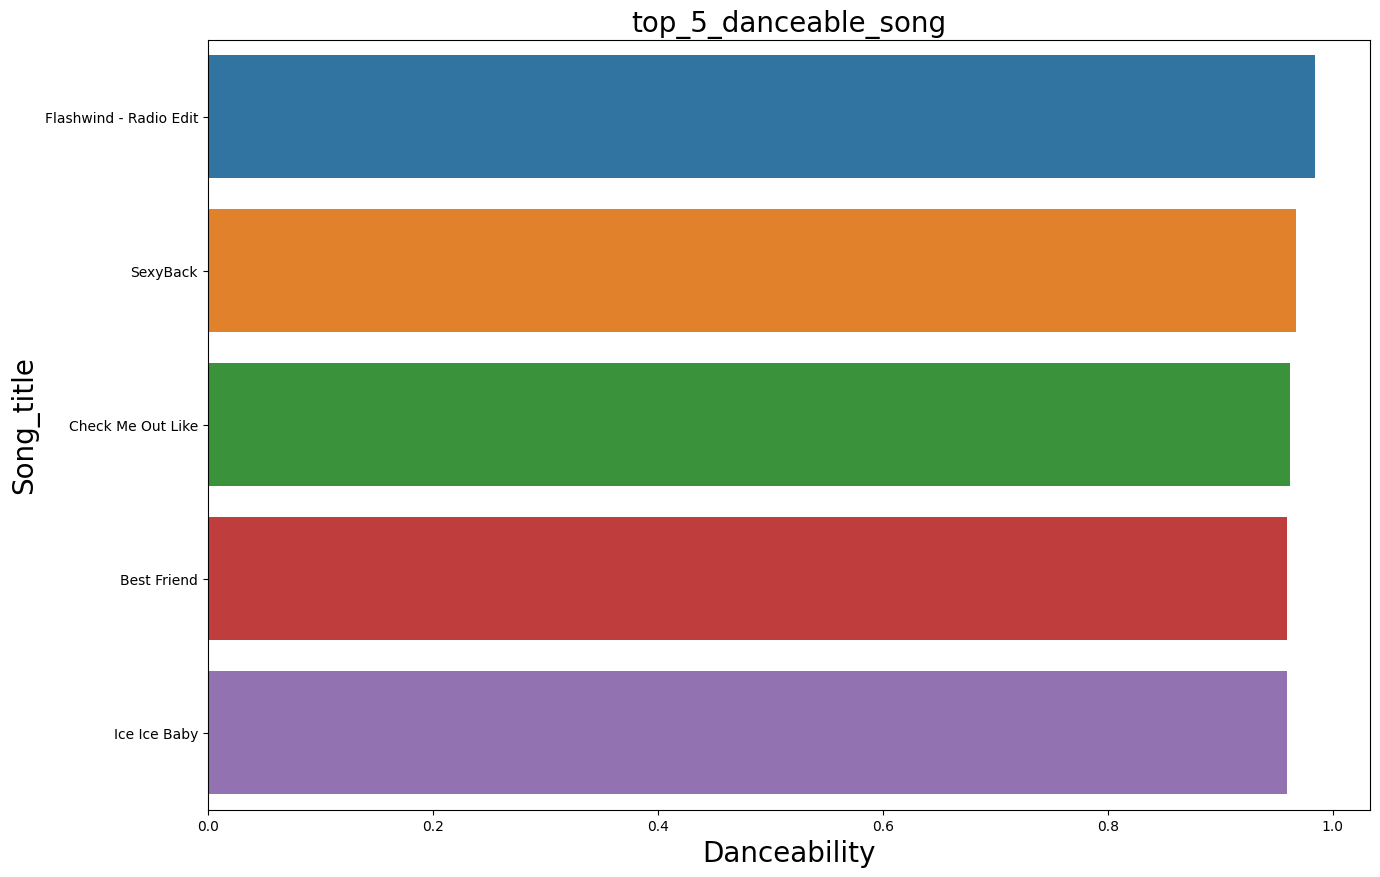

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(x='danceability',y='song_title',data = danceable_song)
plt.title("top_5_danceable_song",fontsize=20)
plt.xlabel("Danceability",fontsize=20)
plt.ylabel("Song_title",fontsize=20)
plt.show()

In [35]:
drake_song = df[df['artist'] == 'Drake']

In [36]:
drake_song

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,target,song_title,artist,review
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,0.264,1,Sneakin’,Drake,positive response
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,0.308,1,Childs Play,Drake,positive response
37,0.05650,0.853,205879,0.547,0.000000,1,0.3410,-7.535,1,0.1940,142.065,0.677,1,Jumpman,Drake,positive response
117,0.00257,0.896,267024,0.623,0.000258,2,0.0390,-8.008,1,0.0571,134.962,0.564,1,Hotline Bling,Drake,positive response
154,0.00157,0.790,217707,0.676,0.000000,8,0.2500,-6.432,0,0.2710,132.002,0.314,1,Big Rings,Drake,positive response
158,0.19000,0.735,275840,0.410,0.000000,11,0.3410,-8.735,0,0.2000,114.812,0.160,1,Know Yourself,Drake,positive response
168,0.04720,0.849,217693,0.408,0.000000,6,0.1010,-8.670,0,0.2840,99.876,0.337,1,Wu-Tang Forever,Drake,positive response
440,0.36900,0.662,236733,0.571,0.000197,6,0.0908,-7.382,0,0.1060,152.009,0.442,1,Headlines,Drake,positive response
589,0.04250,0.790,173160,0.531,0.000000,8,0.2660,-6.968,1,0.1970,86.306,0.498,1,Started From the Bottom,Drake,positive response
676,0.00300,0.766,227027,0.453,0.000035,6,0.0923,-6.651,0,0.0670,100.002,0.346,1,"Hold On, We're Going Home",Drake,positive response


In [37]:
drake_song.shape

(16, 16)

In [38]:
drake_most_danceable_song = dra_ke[['danceability','song_title','artist']].sort_values(by='danceability',ascending = False).head()

In [39]:
drake_most_danceable_song

,danceability,song_title,artist
117,0.896,Hotline Bling,Drake
37,0.853,Jumpman,Drake
168,0.849,Wu-Tang Forever,Drake
5,0.804,Sneakin’,Drake
1183,0.804,Passionfruit,Drake


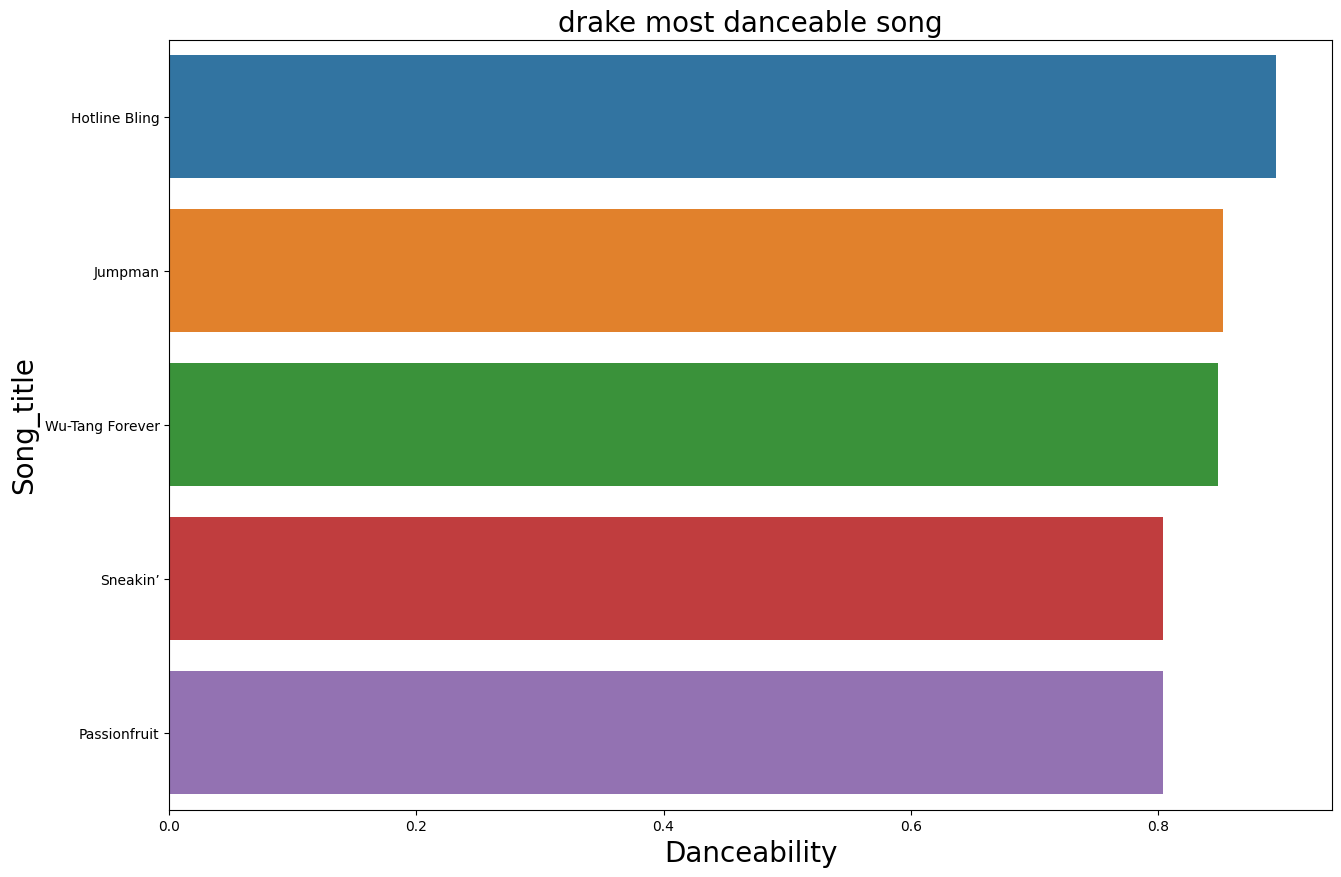

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(x='danceability',y='song_title',data = drake_most_danceable_song)
plt.title("drake most danceable song",fontsize=20)
plt.xlabel("Danceability",fontsize=20)
plt.ylabel("Song_title",fontsize=20)
plt.show()

In [41]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'target', 'song_title', 'artist',
       'review'],
      dtype='object')

In [42]:
instrumenntal_tracks = df[['instrumentalness','song_title','artist']].sort_values(by='instrumentalness',ascending= False).head(10)

In [43]:
instrumenntal_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje
1546,0.956,Almas vaggvisa,Jan Lundgren Trio
1322,0.955,Pitchblack,Walking Dead On Broadway
1349,0.954,Prismatic Abyss,Aversions Crown
1661,0.954,Yebisah,Mark Knight
121,0.952,Chasing Heaven,Bassnectar


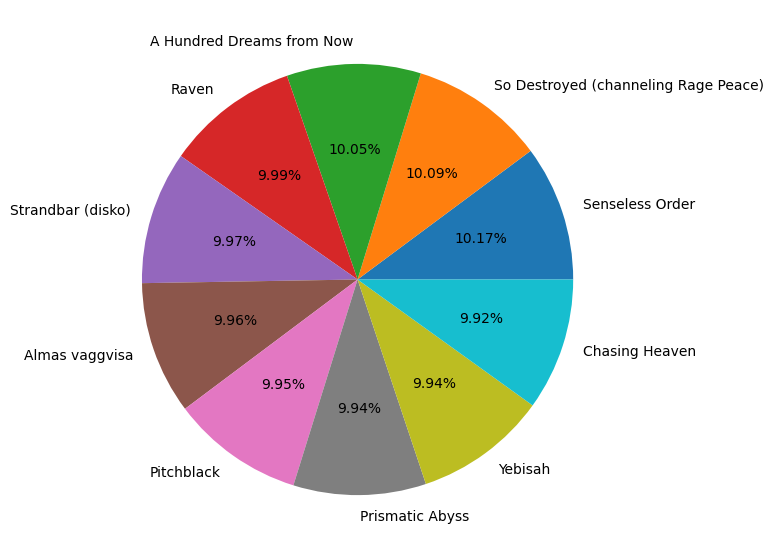

In [45]:
plt.figure(figsize=(12,7))
plt.pie(x='instrumentalness',data=instrumenntal_tracks, autopct='%1.2f%%', labels=instrumenntal_tracks.song_title)
plt.show()

In [46]:
song_review = df['review'].value_counts()

In [47]:
song_review

positive response    1020
negative response     997
Name: review, dtype: int64

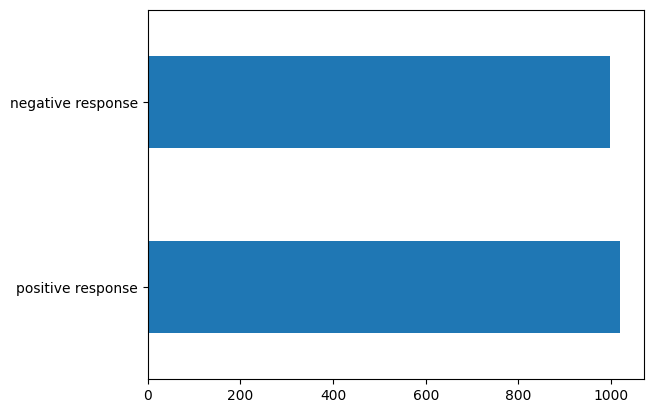

In [48]:
song_review.plot.barh()
plt.show()

In [49]:
positive_song = df[df['target']==1].head(10)

In [50]:
positive_song[['song_title','artist']]

,song_title,artist
0,Mask Off,Future
1,Redbone,Childish Gambino
2,Xanny Family,Future
3,Master Of None,Beach House
4,Parallel Lines,Junior Boys
5,Sneakin’,Drake
6,Childs Play,Drake
7,Gyöngyhajú lány,Omega
8,I've Seen Footage,Death Grips
9,Digital Animal,Honey Claws


In [51]:
interst_column = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence']

C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_data,bins = 50 ,label = 'positive', color = 'green')
C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_da

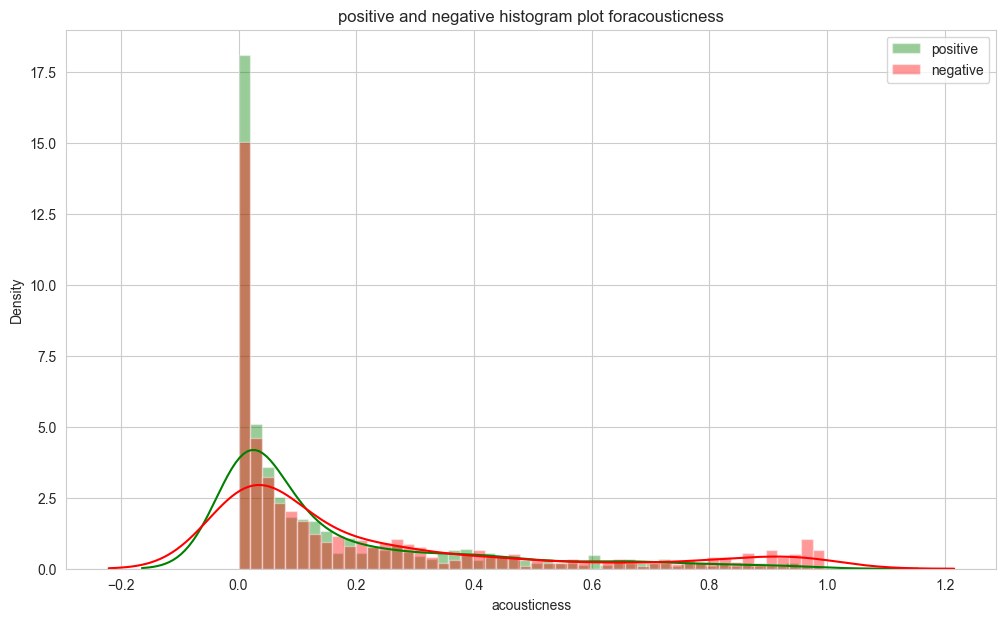

C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_data,bins = 50 ,label = 'positive', color = 'green')
C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_da

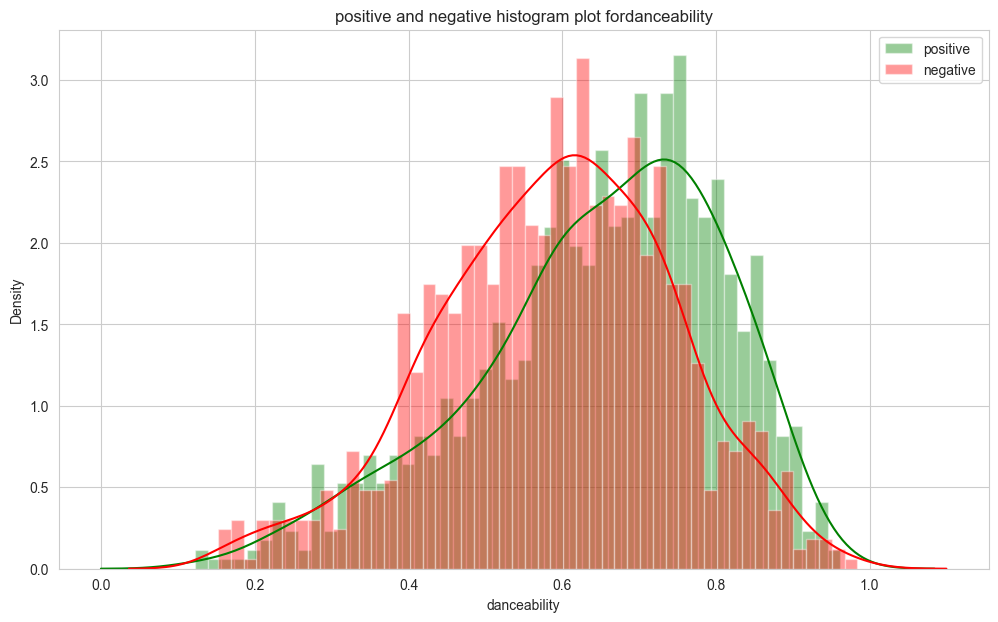

C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_data,bins = 50 ,label = 'positive', color = 'green')
C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_da

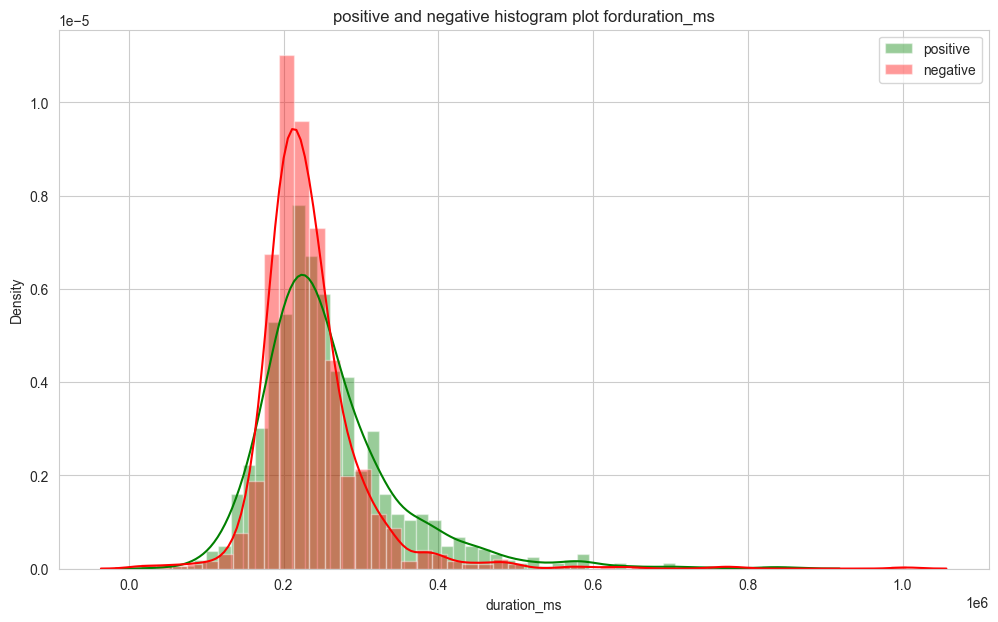

C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_data,bins = 50 ,label = 'positive', color = 'green')
C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_da

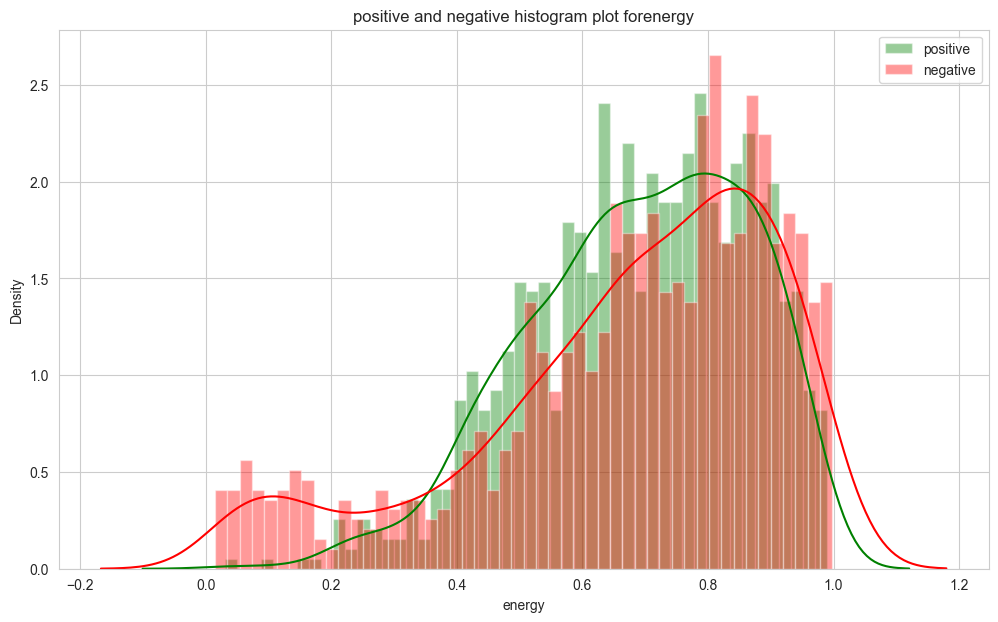

C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_data,bins = 50 ,label = 'positive', color = 'green')
C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_da

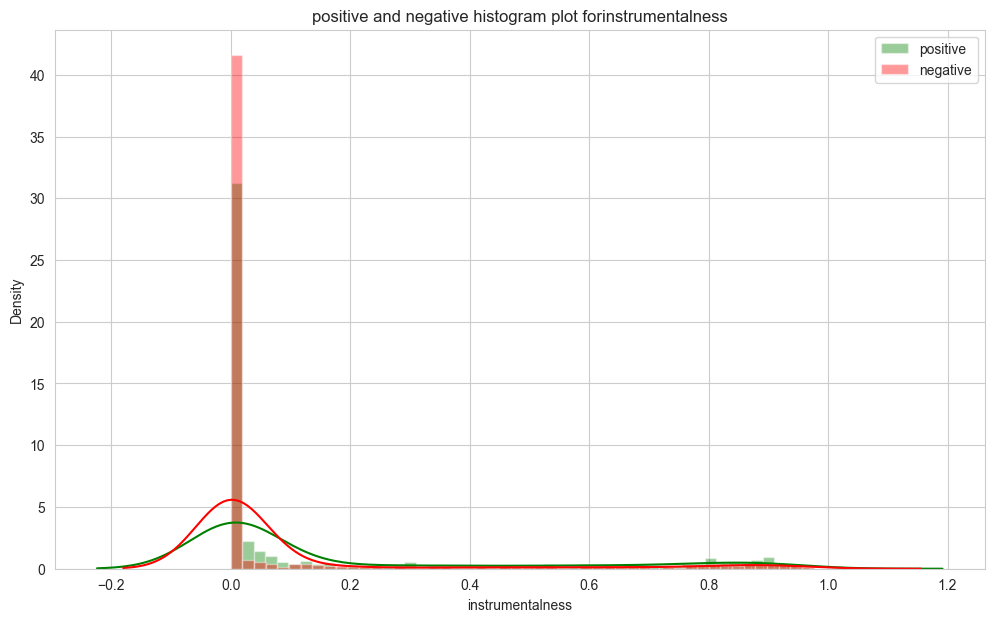

C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_data,bins = 50 ,label = 'positive', color = 'green')
C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_da

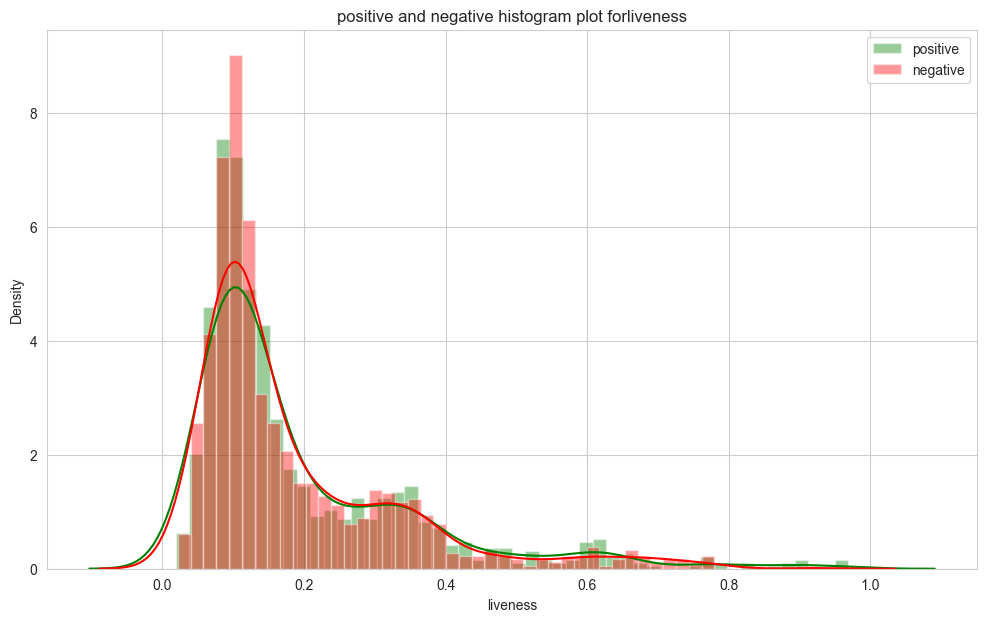

C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_data,bins = 50 ,label = 'positive', color = 'green')
C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_da

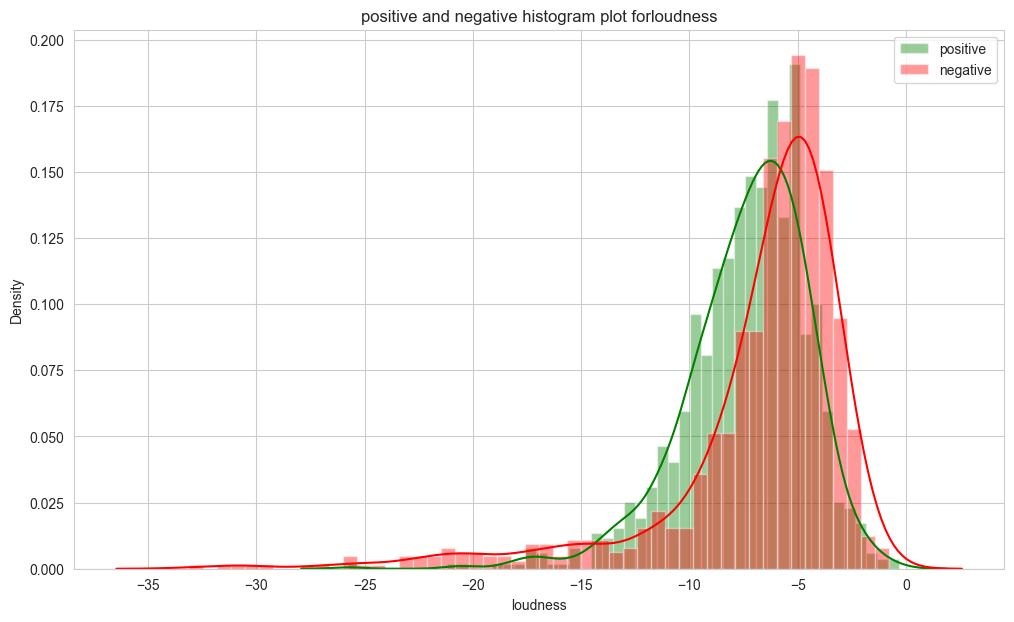

C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_data,bins = 50 ,label = 'positive', color = 'green')
C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_da

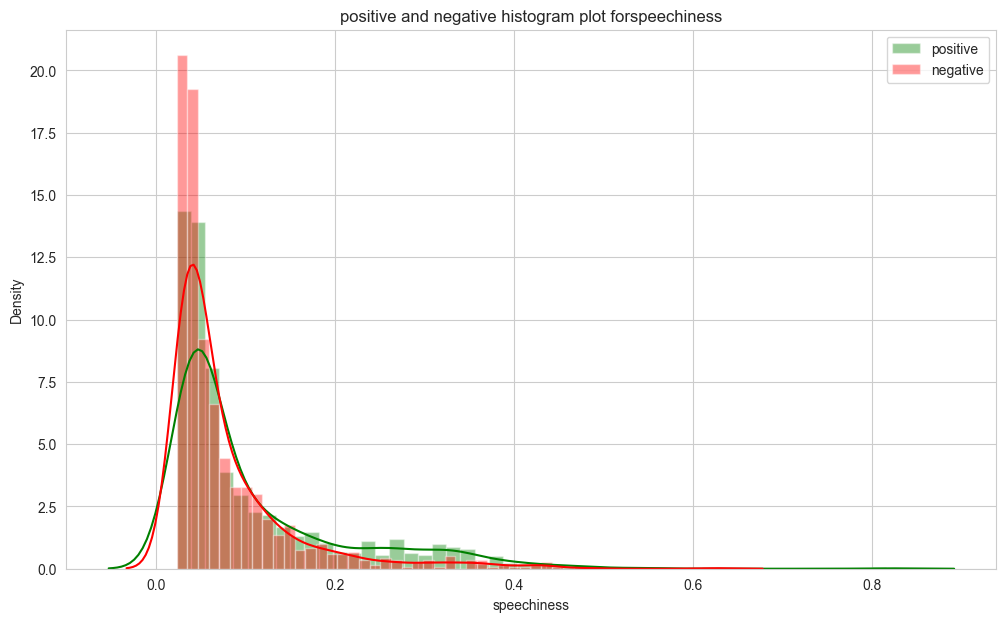

C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_data,bins = 50 ,label = 'positive', color = 'green')
C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_da

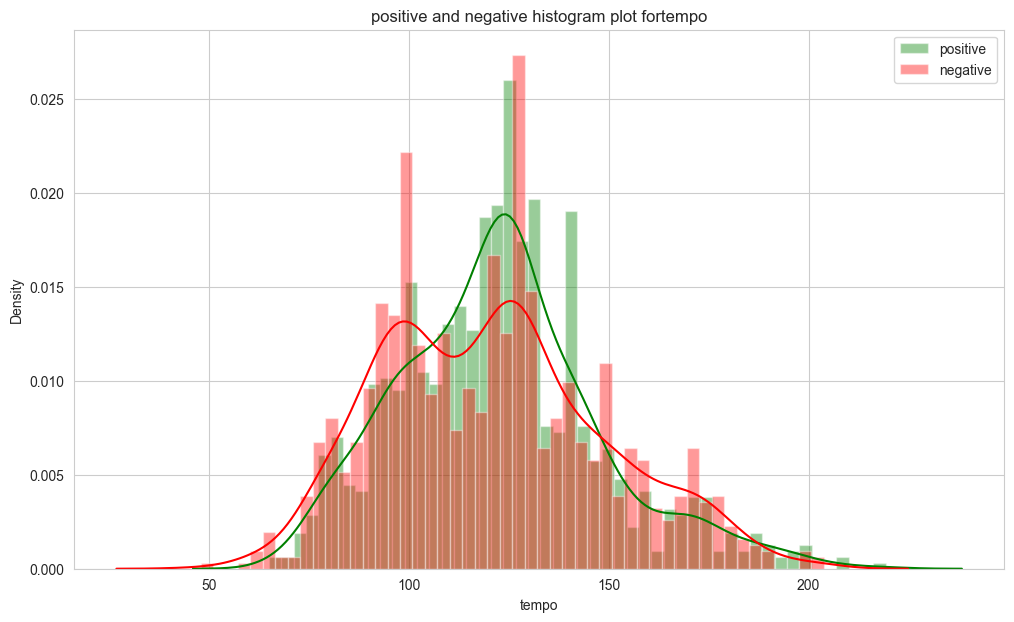

C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_data,bins = 50 ,label = 'positive', color = 'green')
C:\Users\USER\AppData\Local\Temp\ipykernel_4548\3603790062.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_da

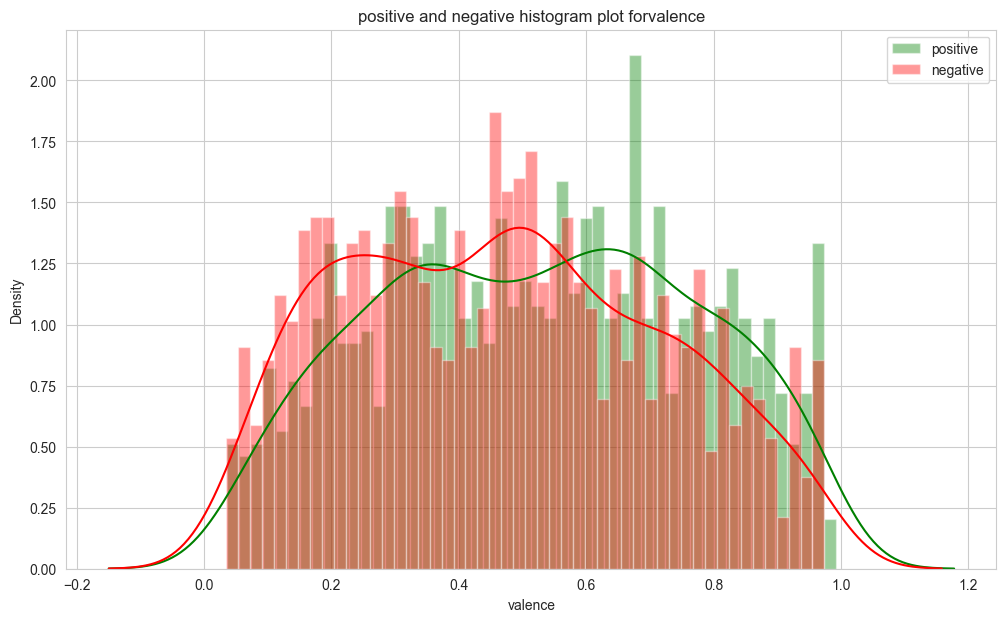

In [52]:
sns.set_style("whitegrid")

for festure_cols in interst_column:
    positive_data = df[df['target']==1][festure_cols]
    negative_data = df[df['target']==0][festure_cols]
    
    plt.figure(figsize=(12,7))
    
    sns.distplot(positive_data,bins = 50 ,label = 'positive', color = 'green')
    sns.distplot(negative_data,bins = 50 ,label = 'negative', color = 'red')
    
    plt.legend(loc='upper right')
    
    plt.title(f"positive and negative histogram plot for{festure_cols}")
    plt.show()

# Result


## FROM THE FOLLOWING OBSERVATION WE CAME TO KNOW THAT IF A SONG fullfill all conditions give below then maximun chances to hit song:-

### Acousticness  0.0 to 0.3

### Danceability 0.7 to 1.0

### Energy 0.4 to 0.8

### Loudness -14 to -6

### Tempo 100 to 150

### Valence 0.6 to 1.0 

### Artist any of them Drake Disclosure Rick Ross then there will be more chances to be hit